## Take a bunch of runs and re-do them with 

In [1]:
from matplotlib import rc
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
import shutil
from pathlib import Path
os.chdir("/home/149/ab8992/topographic-NIWs")
basepath = Path.cwd().absolute()

import autolib as al
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 112.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37283,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 112.00 GiB
Comm: tcp://127.0.0.1:41745,Total threads: 4
Dashboard: /proxy/43737/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:34263,


## Make common forcing

In [9]:
import autolib as al


### COMMON ACROSS ALL EXPERIMENTS. 
##########################################################
nlayers = 50             # number of layers
Lx = 4000                # domain zonal extent [km]
Ly = 4000                # domain meridional extent [km]
H  = 4000                # total fluid's depth in [m]
gridspacing = 2          # in [km]
flat = False
reverse = True
x = np.arange(-Lx/2, Lx/2, gridspacing)
y = np.arange(-Ly/2, Ly/2, gridspacing)
ninterf = nlayers + 1    # number of interfaces
interfaces = np.arange(0,  ninterf)
nx = int(round(Lx/gridspacing))
ny = int(round(Ly/gridspacing))
overrides = ["ADIABATIC = True",
             "RHO_0 = 1027.0",
             f"NJGLOBAL={ny}",
             f"NIGLOBAL={nx}",
             f"LENLON = {Lx}.0",
             f"WESTLON = -{Lx//2}.0",
             f"LENLAT = {Ly}.0",
             f"WESTLAT = -{Ly//2}.0",
             f"NK = {nlayers}"]
default_dir = "default_rundir"


## Default values when unperturbed
default_height = 500 # m
default_forcing_latwidth = 300 # km
default_duration = 5 # hours
default_layerdensities = np.linspace(1027,1029,nlayers) ## This is the default stratification
default_strength = 1
default_ridge_width = 12.5 # km


## Value s from first pass! 
## Perterbation values
## strat variables 
strats = [0.25,0.2,0.5,0.75,1,1.25,1.5,2,3,4,0.001,0.01,6]

## Height
heights = [10,20,50,80,120,150,225,275,350,450,600,750,1000,1250,1500,2000] + [500,650,700]
# heights = [1000]
## Duration
durations = [0.5,1,2,3,4,5,6,8.7,10] + [7,8,12,14,15,16,20] ## Note! Will need to modify the amount of time that model runs for with forcing in this case

## Strength
strengths = [0.1,0.2,0.5,0.75,1,1.25,1.5,2,3,4,10] + [5,6,7,8,9]

## Topog Width
widths = [4,8,12.5,16,25,35,50,100,200] + [75,125,150,300,400,500,600,700,800,1000]

## Forcing Width
forcing_widths = [25,50,75,100,150,175,200,300,500,800,1000] + [250,400]



## Save the common wind forcing
# STRESS_X = al.windstress_gaussian(nx = nx,ny = ny)
# eta_ridge = al.eta_gaussian_hill(
#         nlayers=nlayers,
#         ridge=True,
#         nx = nx,
#         ny = ny,
#         )
   
# al.save_inputdata(
#     x,
#     y,
#     STRESS_X,
#     STRESS_X * 0,
#     eta_ridge,
#     "common",
#     save_wind = False
#     )


In [12]:
import subprocess
# heights = [10]
for height in heights:
    expt = al.expt(x,y,nlayers,"height",height,overrides=overrides)
    # expt.make_inputs()
    path = al.basepath / "rundirs" / expt.variable / f"{expt.variable}_{expt.var_value}"
    if (path / "archive" / "output000").exists():
        print(path)
        subprocess.run(
            f"qsub {str(path / 'postprocessing.sh')} & ",
            shell = True,
            cwd=str(path)
        )
    # if not (path / "archive" / "output000").exists():
    #     print(path)
    #     expt.setup()
    #     expt.run()

        # subprocess.run(
        #     f"qsub {str(path / 'postprocessing.sh')} & ",
        #     shell = True,
        #     cwd=str(path)
        # )
    # expt.run(fast = True)

/home/149/ab8992/topographic-NIWs/rundirs/height/height_10
/home/149/ab8992/topographic-NIWs/rundirs/height/height_50
/home/149/ab8992/topographic-NIWs/rundirs/height/height_120
/home/149/ab8992/topographic-NIWs/rundirs/height/height_275
/home/149/ab8992/topographic-NIWs/rundirs/height/height_350
/home/149/ab8992/topographic-NIWs/rundirs/height/height_450
/home/149/ab8992/topographic-NIWs/rundirs/height/height_750
/home/149/ab8992/topographic-NIWs/rundirs/height/height_1000
/home/149/ab8992/topographic-NIWs/rundirs/height/height_1250
/home/149/ab8992/topographic-NIWs/rundirs/height/height_1500
/home/149/ab8992/topographic-NIWs/rundirs/height/height_2000
/home/149/ab8992/topographic-NIWs/rundirs/height/height_500
/home/149/ab8992/topographic-NIWs/rundirs/height/height_650
122371149.gadi-pbs
/home/149/ab8992/topographic-NIWs/rundirs/height/height_700


122371150.gadi-pbs
122371151.gadi-pbs
122371152.gadi-pbs
122371153.gadi-pbs
122371154.gadi-pbs
122371155.gadi-pbs
122371156.gadi-pbs
122371157.gadi-pbs
122371158.gadi-pbs
122371159.gadi-pbs
122371160.gadi-pbs
122371161.gadi-pbs
122371162.gadi-pbs


In [3]:
# heights = 

for height in heights:
    expt = al.expt(x,y,nlayers,"height",height,overrides=overrides)
    # expt.make_inputs()
    expt.setup()
    # expt.run(fast = True)
    




RUNNING: height_10
122332263.gadi-pbs
payu: warning: Job request includes 12 unused CPUs.
payu: warning: CPU request increased from 900 to 912
Loading input manifest: manifests/input.yaml
Loading restart manifest: manifests/restart.yaml
Loading exe manifest: manifests/exe.yaml
payu: Found modules in /opt/Modules/v4.3.0
qsub -q normal -P v45 -l walltime=21600 -l ncpus=912 -l mem=3648GB -N height_10 -l wd -j n -v PAYU_PATH=/g/data/hh5/public/apps/miniconda3/envs/analysis3/bin,PAYU_FORCE=True,MODULESHOME=/opt/Modules/v4.3.0,MODULES_CMD=/opt/Modules/v4.3.0/libexec/modulecmd.tcl,MODULEPATH=/etc/scl/modulefiles:/opt/Modules/modulefiles:/opt/Modules/v4.3.0/modulefiles:/apps/Modules/modulefiles -W umask=027 -l storage=gdata/hh5+gdata/v45+scratch/v45 -- /g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/bin/python3.10 /g/data/hh5/public/apps/miniconda3/envs/analysis3/bin/payu-run
RUNNING: height_20
122332265.gadi-pbs
payu: warning: Job request includes 12 unused CPUs.
payu: warning: CPU re

In [13]:
expt = al.expt(x,y,nlayers,"height",1000,overrides=overrides)

In [4]:
expt.setup()

In [5]:
expt.run(n=50)

RUNNING: height_1000
laboratory path:  /scratch/v45/ab8992/mom6
binary path:  /scratch/v45/ab8992/mom6/bin
input path:  /scratch/v45/ab8992/mom6/input
work path:  /scratch/v45/ab8992/mom6/work
archive path:  /scratch/v45/ab8992/mom6/archive
payu: work path already exists.
      Sweeping as --force option is True.
Removing work path /scratch/v45/ab8992/mom6/work/height_1000
Removing symlink /home/149/ab8992/topographic-NIWs/rundirs/height/height_1000/work
Loading input manifest: manifests/input.yaml
Loading restart manifest: manifests/restart.yaml
Loading exe manifest: manifests/exe.yaml
Setting up mom6
Checking exe and input manifests
Updating full hashes for 1 files in manifests/exe.yaml
Creating restart manifest
Writing manifests/restart.yaml
Writing manifests/exe.yaml
122313825.gadi-pbs
payu: warning: Job request includes 47 unused CPUs.
payu: warning: CPU request increased from 625 to 672
Loading input manifest: manifests/input.yaml
Loading restart manifest: manifests/restart.yaml


In [20]:
data_e = data["zonal"].e
data_u = data["zonal"].u.interp(xq = data_e.xh).drop("xq")

data_u = (data_u - data_u.mean("xh")).sel(xh = slice(-400,400))

data_e = data_e.mean("yh").persist()
data_u = data_u.mean("yh").persist()

/jobfs/122370671.gadi-pbs/ipykernel_134346/4155280301.py:2: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  data_u = data["zonal"].u.interp(xq = data_e.xh).drop("xq")


In [14]:
data = expt.load()

17.453292519943293
0


ValueError: all input arrays must have the same shape

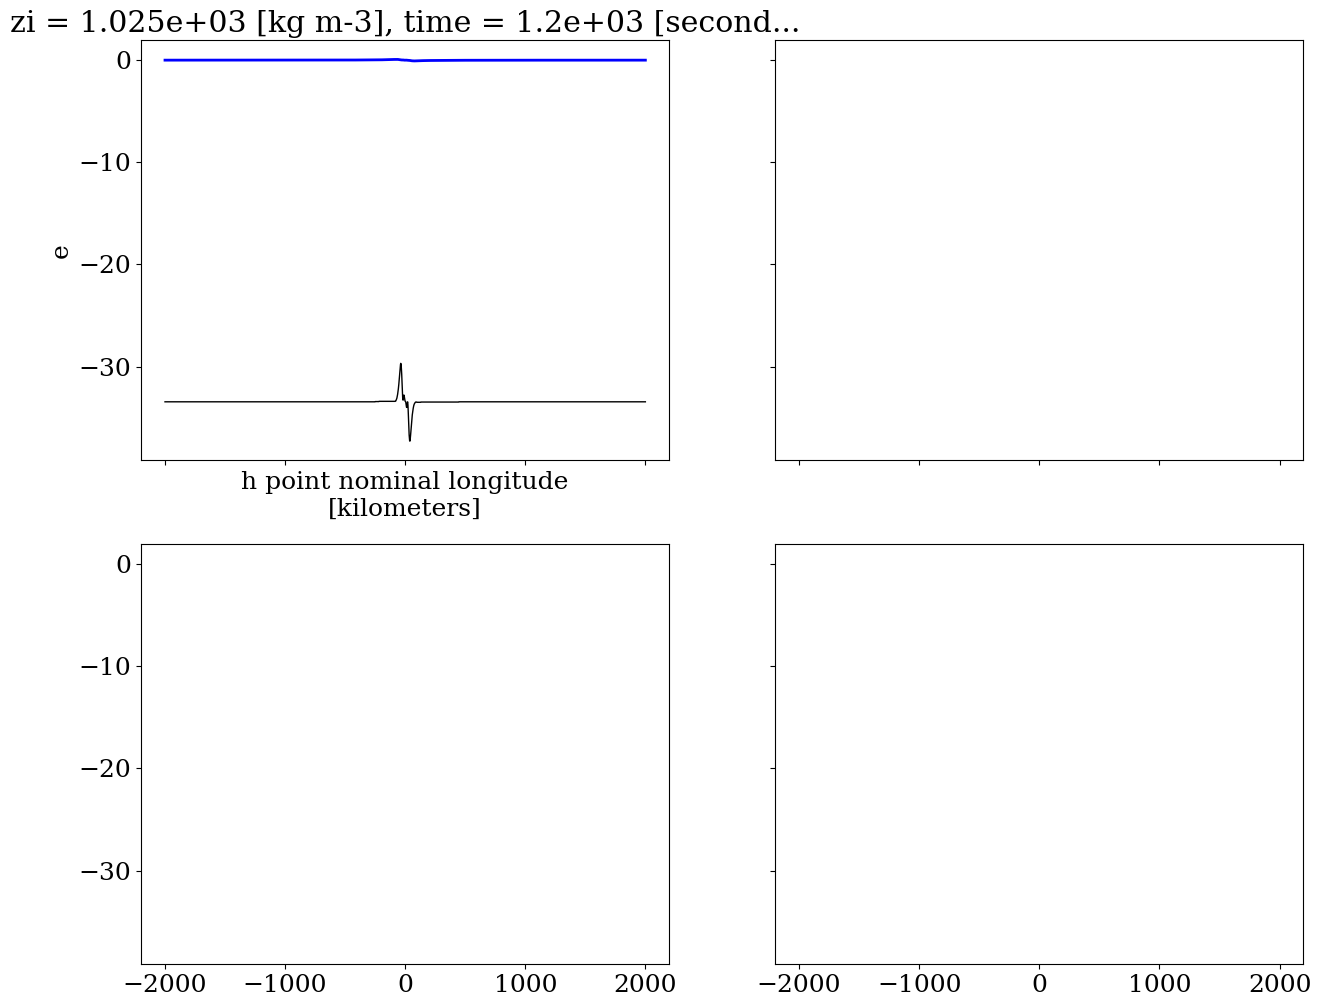

In [23]:
from matplotlib.gridspec import GridSpec
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib
font = {'family' : 'serif',
        'weight':'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
cmap = "coolwarm"
framedim = "time"
import seaborn as sns


# cmap = sns.color_palette("coolwarm", as_cmap=True,sep = 50)


def snapshot(time,ax):
    tt = time
    
    
    vmax = data_u.isel(time = tt).max().values * 0.1
    vmax = 0.0001
    vmin = -1 * vmax
    scaling = 3000 # Scale the anomaly in interface height
    x = data_u.xh
    mean_depths = data_e.isel(time = 0)
    base = mean_depths.isel(zi = 0)
    deviation = (data_e.isel(time = tt).isel(zi = 0) - mean_depths[0,tt])
    layer = base + deviation * scaling
    layer.plot(ax = ax,color = "blue",linewidth = 2)
    # for i in range(data_e.zi.shape[0] - 1):
    for i in range(0,50):
        prev_layer = layer
        
        ## Plot this layer 
        base = mean_depths.isel(zi = i+1)
        deviation = (data_e.isel(time = tt).isel(zi = i+1) - mean_depths.isel(zi = i+1))
        layer = base + deviation * scaling
        layer.plot(ax = ax,color = "black",linewidth = 1)
    
    
        # Create patch for the clipping of velocity field to fill space between layers. See https://matplotlib.org/stable/tutorials/advanced/path_tutorial.html
        
        verts = np.vstack([np.stack([x, prev_layer], 1), np.stack([np.flip(x), np.flip(layer)], 1)]) ## creates vertices 
        path = Path(verts)
        patch = PathPatch(path, lw = 2,transform=ax.transData) ## patch to clip the velocity field
    
        # Plot velocity field and apply patch as clip path
        velfield = data_u.isel(time = tt,zl = i).expand_dims({"vert":2},axis = 1)
        extent=[x[0].values.reshape(1)[0],x[-1].values.reshape(1)[0],prev_layer.min().values.reshape(1)[0],layer.max().values.reshape(1)[0]]
        X,Y = np.meshgrid(np.linspace(x[0].values.reshape(1)[0],x[-1].values.reshape(1)[0],x.shape[0]),np.linspace(prev_layer.min().values.reshape(1)[0],layer.min().values.reshape(1)[0],2))
        im = ax.pcolormesh(X, Y, velfield.T,cmap = cmap,vmin = vmin,vmax = vmax)
        im.set_clip_path(patch)
    

    for i in range(0,50):
        prev_layer = layer
        
        ## Plot this layer 
        base = mean_depths.isel(zi = i+1)
        deviation = (data_e.isel(time = tt).isel(zi = i+1) - mean_depths.isel(zi = i+1))
        layer = base + deviation * scaling
        layer.plot(ax = ax,color = "black",linewidth = 2)


        # Create patch for the clipping of velocity field to fill space between layers. See https://matplotlib.org/stable/tutorials/advanced/path_tutorial.html
        
        verts = np.vstack([np.stack([x, prev_layer], 1), np.stack([np.flip(x), np.flip(layer)], 1)]) ## creates vertices 
        path = Path(verts)
        patch = PathPatch(path, lw = 2,transform=ax.transData) ## patch to clip the velocity field

        # Plot velocity field and apply patch as clip path
        velfield = data_u.isel(time = tt,zl = i).expand_dims({"vert":2},axis = 1)
        extent=[x[0].values.reshape(1)[0],x[-1].values.reshape(1)[0],prev_layer.min().values.reshape(1)[0],layer.max().values.reshape(1)[0]]
        X,Y = np.meshgrid(np.linspace(x[0].values.reshape(1)[0],x[-1].values.reshape(1)[0],x.shape[0]),np.linspace(prev_layer.min().values.reshape(1)[0],layer.min().values.reshape(1)[0],2))
        im = ax.pcolormesh(X, Y, velfield.T,cmap = cmap,vmin = vmin,vmax = vmax)
        im.set_clip_path(patch)

    
    
    ## Handle bottom layer case
    prev_layer = layer
    layer = data_e.isel(time = 0,zi = -1)
    
    layer.plot(ax = ax,color = "green",linewidth = 1)
    
    verts = np.vstack([np.stack([x, layer], 1), np.stack([np.flip(x), np.flip(prev_layer)], 1)])
    path = Path(verts)
    
    patch = PathPatch(path, lw = 2,transform=ax.transData)
    
    # Plot bottom layer velocity
    velfield = data_u.isel(time = tt,zl = -1).expand_dims({"vert":2},axis = 1) 
    extent=[x[0].values.reshape(1)[0],x[-1].values.reshape(1)[0],prev_layer.min().values.reshape(1)[0],layer.max().values.reshape(1)[0]]
    X,Y = np.meshgrid(np.linspace(x[0].values.reshape(1)[0],x[-1].values.reshape(1)[0],data_u.xh.shape[0]),np.linspace(prev_layer.max().values.reshape(1)[0],layer.min().values.reshape(1)[0],2))
    im = ax.pcolormesh(X, Y, velfield.T,cmap = cmap,vmin = vmin,vmax = vmax)
    im.set_clip_path(patch)
    ax = plt.gca()
    ax.set_ylim([-4000,10])
    # ax.get_yaxis().ylim((-4000,0))
    
    # ax.set_yticks([])
    # ax.set_xticks([])
    # # canvas.invert_yaxis()
    # # canvas.set_title("Unfiltered, middle of channel slice")
    # add colorbar with caption
    # fig.colorbar(im, ax=ax, label='Horinzontal velocity (m/s)')

    
    return ax
    

fig,axes = plt.subplots(2,2,figsize = (15,12),sharey = True,sharex=True)


start = 80

## Get inertial period
fp = (2 * np.pi / 0.0001) / 3600
print(fp)
fp_10mins = fp * 6

captions = ["a) t = 12 hrs (During storm)","b) + 0.5 inertial periods","c) + 1 inertial period","d) + 1.5 inertial periods"]

# for i,time in enumerate([30,60,120,180]):
# for i,time in enumerate([start,start + round(fp_10mins * 0.5),start + round(fp_10mins * 1),start + round(fp_10mins * 1.5)]):
#     print(i)
#     snapshot(time,axes[i//2,i%2])
#     axes[i//2,i%2].set_title("")

#     axes[i//2,i%2].set_title(captions[i],loc = "left")


#     axes[i//2,i%2].set_xlabel("Longitude (km)")
#     axes[i//2,i%2].set_ylabel("Depth (m)")
#     axes[i//2,i%2].set_yticklabels([4000,3000,2000,1000,0])
#     axes[i//2,i%2].set_yticks([-4000,-3000,-2000,-1000,0])
#     if i%2 != 0:
#         axes[i//2,i%2].set_ylabel("")
#     if i//2 != 1:
#         axes[i//2,i%2].set_xlabel("")

# for i,time in enumerate([start,start + round(fp_10mins * 0.5),start + round(fp_10mins * 1),start + round(fp_10mins * 1.5)]):
print(i)
i = 0
time = 20
snapshot(time,axes[i//2,i%2])
axes[i//2,i%2].set_title("")

axes[i//2,i%2].set_title(captions[i],loc = "left")


axes[i//2,i%2].set_xlabel("Longitude (km)")
axes[i//2,i%2].set_ylabel("Depth (m)")
axes[i//2,i%2].set_yticklabels([4000,3000,2000,1000,0])
axes[i//2,i%2].set_yticks([-4000,-3000,-2000,-1000,0])
if i%2 != 0:
    axes[i//2,i%2].set_ylabel("")
if i//2 != 1:
    axes[i//2,i%2].set_xlabel("")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])

norm = matplotlib.colors.Normalize(vmin=-1e-1, vmax=1e-1)
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap="coolwarm"),cax = cbar_ax,label = f"Velocity (mm/s)")
cbar.set_ticks([-0.1,-0.05,0,0.05,0.1])
cbar.set_ticklabels([-0.1,-0.05,0,0.05,0.1])


